In [1]:
import os

# Cambiar el directorio de trabajo actual
os.chdir("C:\\Users\\cvasquezv\\kaggle\\Artrhopods Order Detection")

# Ahora, las rutas relativas se basarán en el nuevo directorio actual

In [2]:
# Obtener la ruta actual del directorio
current_directory = os.getcwd()
current_directory

'c:\\Users\\cvasquezv\\kaggle\\Artrhopods Order Detection'

In [2]:
#!pip install opencv-python

In [3]:
#!pip install opencv-contrib-python

In [3]:
import numpy as np 
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from glob import glob
from tqdm.notebook import tqdm
tqdm.pandas()
import random
import json
from sklearn.model_selection import train_test_split
import shutil
import yaml
plt.style.use("ggplot")


In [4]:
print(cv.__version__)

4.8.0


In [6]:
BASE_DIR = "C:/Users/cvasquezv/kaggle/Artrhopods Order Detection/input/arthropod-taxonomy-orders-object-detection-dataset"
annotation_list = glob("C:/Users/cvasquezv/kaggle/Artrhopods Order Detection/input/arthropod-taxonomy-orders-object-detection-dataset/ArTaxOr/*/annotations/*.json")

In [7]:
data = pd.DataFrame()
data["annotation_dir"] = annotation_list

In [8]:
data

,annotation_dir
0,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...
1,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...
2,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...
3,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...
4,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...
...,...
15371,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...
15372,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...
15373,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...
15374,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...


In [9]:
def read_json_data(jsonfile):
    rows = {"img_dir":[] ,"img_w":[] , "img_h" : [], "sp_type": [] ,"xc":[] , "yc":[], "bb_height" : [] , "bb_width": [] , "bb_left":[] , "bb_top":[]}
    
    # read file
    json_f = open(jsonfile)
    json_f = json.load(json_f)
 
    for region in json_f["regions"]:
        img_dir = json_f["asset"]["path"][7:]
        
        sp_type = region["tags"][0]
        
        img_w = json_f["asset"]["size"]["width"]
        img_h = json_f["asset"]["size"]["height"]
        
        # Normalize Bounding Box 
        bb_height = region["boundingBox"]["height"] / img_h
        bb_width = region["boundingBox"]["width"] / img_w
        
        bb_left = region["boundingBox"]["left"] / img_w
        bb_top = region["boundingBox"]["top"] / img_h
        
        xcenter = region['boundingBox']['left']/img_w+0.5*bb_width
        ycenetr = region['boundingBox']['top']/img_h+0.5*bb_height
        
        rows["img_dir"].append(BASE_DIR+img_dir)
        rows["sp_type"].append(sp_type)
        rows["img_w"].append(img_w)
        rows["img_h"].append(img_h)
        rows["bb_height"].append(bb_height)
        rows["bb_width"].append(bb_width)
        rows["bb_left"].append(bb_left)
        rows["bb_top"].append(bb_top)
        rows["xc"].append(xcenter)
        rows["yc"].append(ycenetr)

    return rows

In [10]:
df = pd.DataFrame()

In [11]:
for json_file in tqdm(data["annotation_dir"]):
    rows = read_json_data(json_file)
    
    # Crea un nuevo DataFrame a partir del diccionario y luego concaténalo con el DataFrame principal
    df = pd.concat([df, pd.DataFrame.from_dict(rows)], ignore_index=True)

# Ahora df contiene todos los datos combinados


  0%|          | 0/15376 [00:00<?, ?it/s]

In [13]:
df = df.reset_index(drop=True)

In [14]:
df.head()

,img_dir,img_w,img_h,sp_type,xc,yc,bb_height,bb_width,bb_left,bb_top
0,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...,3106,2071,Diptera,0.457960,0.485781,0.459152,0.273604,0.321158,0.256205
1,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...,3106,2071,Araneae,0.564094,0.399948,0.423992,0.352171,0.388008,0.187952
2,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...,2048,1480,Araneae,0.548335,0.493295,0.676245,0.650519,0.223075,0.155172
3,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...,1542,1157,Araneae,0.483133,0.528037,0.425234,0.299240,0.333513,0.315421
4,C:/Users/cvasquezv/kaggle/Artrhopods Order Det...,2981,1980,Araneae,0.504824,0.524783,0.545643,0.251551,0.379049,0.251961


In [17]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/250.0 kB 279.3 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 459.5 kB/s eta 0:00:01
     -------------------- --------------- 143.4/250.0 kB 708.1 kB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.0 MB/s eta 0:00:00


In [18]:
import openpyxl

# Guardar el DataFrame en un archivo Excel
df.to_excel('data info.xlsx', index=False)  # Cambia 'nombre_del_archivo.xlsx' por el nombre que desees

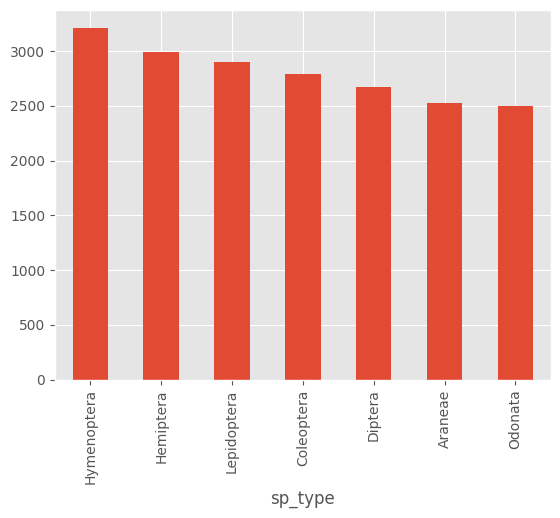

In [19]:
df.sp_type.value_counts().plot(kind='bar')
plt.show()

## Display Some examples

In [20]:
def display_random_imgs(df , rows , cols):
        idxs = random.sample(df.index.tolist() , rows*cols)
        fig , ax = plt.subplots(rows , cols ,figsize = (10,10))
        if rows*cols != 1:
            for count , axs in enumerate(ax.flatten()):

                path = df.img_dir.iloc[idxs[count]]
                patch = patches.Rectangle((df.bb_left.iloc[idxs[count]] * df.img_w.iloc[idxs[count]],
                                           df.bb_top.iloc[idxs[count]]* df.img_h.iloc[idxs[count]]),
                                          df.bb_width.iloc[idxs[count]]* df.img_w.iloc[idxs[count]],
                                          df.bb_height.iloc[idxs[count]]* df.img_h.iloc[idxs[count]],
                                          linewidth=1, edgecolor='r', facecolor='none')
                img = plt.imread(path)
                axs.imshow(img)
                axs.add_patch(patch)
                axs.axis('off')
                axs.title.set_text(df.sp_type.iloc[idxs[count]])

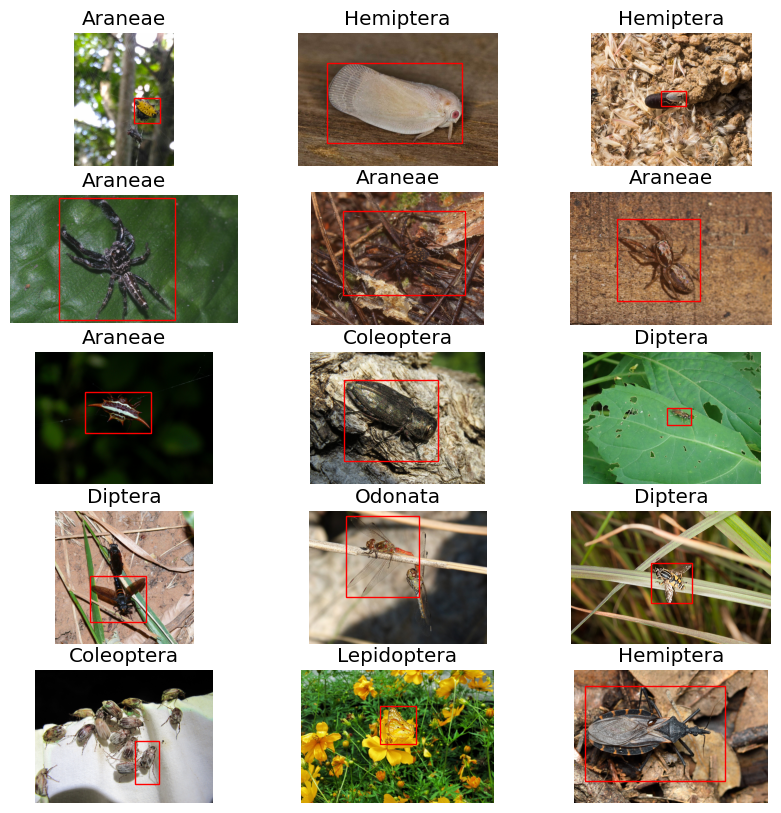

In [21]:
display_random_imgs(df ,5, 3)

In [22]:
classes_name = ["Hymenoptera","Hemiptera","Lepidoptera","Coleoptera","Diptera","Araneae","Odonata"]
classes_num = [0,1,2,3,4,5,6]

df.sp_type = df.sp_type.replace(classes_name , classes_num)

In [23]:
train , test = train_test_split(df ,test_size = 0.2)

In [24]:
# Crear directorios
os.makedirs("/working/data/train", exist_ok=True)
os.makedirs("/working/data/test", exist_ok=True)


In [25]:
def add_data_to_folder(file_type, data):
    for index, row  in tqdm(data.iterrows(),total=len(data)):
        shutil.copy(row["img_dir"] , f"C:/Users/cvasquezv/kaggle/Artrhopods Order Detection/working/data/{file_type}")
        with open(f'C:/Users/cvasquezv/kaggle/Artrhopods Order Detection/working/data/{file_type}/{row.img_dir.split("/")[-1][:-4]}.txt' , "w") as f:
            f.write(str(row["sp_type"]))
            f.write(" ")
            f.write(str(row["xc"]))
            f.write(" ")
            f.write(str(row["yc"]))
            f.write(" ")
            f.write(str(row["bb_width"]))
            f.write(" ")
            f.write(str(row["bb_height"]))
            f.write("\n")
            f.close()

In [2]:
import random

random.seed(123)  # Establece la semilla de aleatorización

# A continuación, puedes usar funciones de generación de números aleatorios, como random.randint(), etc.


In [3]:
add_data_to_folder("train" , train)
add_data_to_folder("test" , test)

NameError: name 'train' is not defined

In [108]:
# create yml file
#yaml_dict = dict(
#    train = 'C:/Users/cvasquezv/kaggle/working/data/train',
#    val = 'C:/Users/cvasquezv/kaggle/working/data/test',
#    
#    nc    = len(classes_num), # number of classes
#    names = classes_name # classes
#    )

#with open('C:/Users/cvasquezv/kaggle/working/data.yaml', 'w') as outfile:
#    yaml.dump(yaml_dict, outfile, default_flow_style=False)

#%cat C:/Users/cvasquezv/kaggle/working/data.yaml

UsageError: Line magic function `%cat` not found.


In [31]:
with open('C:/Users/cvasquezv/kaggle/Artrhopods Order Detection/working/data.yaml', 'r') as infile:
    yaml_content = infile.read()

print(yaml_content)


names:
- Hymenoptera
- Hemiptera
- Lepidoptera
- Coleoptera
- Diptera
- Araneae
- Odonata
nc: 7
train: C:/Users/cvasquezv/kaggle/working/data/train
val: C:/Users/cvasquezv/kaggle/working/data/test



## Yolo v8

In [32]:
import ultralytics
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.175  Python-3.11.5 torch-2.0.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Setup complete  (8 CPUs, 39.7 GB RAM, 346.3/476.3 GB disk)


In [33]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)
batch_size = 8
imgsz = 640

100%|██████████| 21.5M/21.5M [00:04<00:00, 4.93MB/s]


In [34]:
del df , data

In [114]:
# Use the model
results = model.train(data="C:/Users/cvasquezv/kaggle/working/data.yaml",
                      epochs=10,
                      batch = batch_size,
                      imgsz=imgsz)  # train the model

New https://pypi.org/project/ultralytics/8.0.176 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.175  Python-3.11.5 torch-2.0.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/cvasquezv/kaggle/working/data.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vis

       6/10         0G      0.892      1.267      1.299          8        640: 100%|██████████| 1574/1574 [3:56:39<00:00,  9.02s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 222/222 [22:01<00:00,  5.95s/it]
                   all       3541       3541      0.614      0.568      0.595      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/10         0G     0.8253      1.144      1.243          8        640: 100%|██████████| 1574/1574 [10:50:25<00:00, 24.79s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 222/222 [2:17:25<00:00, 37.14s/it]     
                   all       3541       3541      0.683      0.601      0.646      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/10         0G     0.7676      1.031      1.196          8        640: 100%|██████████| 1574/157

In [6]:
from ultralytics import YOLO

# Crear una instancia del modelo YOLOv8
model = YOLO("C:/Users/cvasquezv/kaggle/Artrhopods Order Detection/runs/detect/train/weights/best.pt")

# Ahora, el modelo está cargado y listo para realizar inferencias


In [7]:
# Ruta al directorio que contiene las imágenes
ruta_imagenes = "working\\data\\test\\"

In [8]:
# Obtener la lista de archivos de imagen en el directorio
image_files = [f for f in os.listdir(ruta_imagenes) if f.endswith((".jpg", ".jpeg", ".png"))]

# Construir rutas completas de las imágenes
image_paths = [os.path.join(ruta_imagenes, file) for file in image_files]

# Ahora, image_paths contiene las rutas completas de las imágenes
print(image_paths)

['working\\data\\test\\002b37ac08e1.jpg', 'working\\data\\test\\002da3868a1a.jpg', 'working\\data\\test\\0036742ac4ec.jpg', 'working\\data\\test\\003eb3db1665.jpg', 'working\\data\\test\\004de63c1ac1.jpg', 'working\\data\\test\\00594c648f4d.jpg', 'working\\data\\test\\006bc25a2e6d.jpg', 'working\\data\\test\\007e1a3a7667.jpg', 'working\\data\\test\\00bb5f944597.jpg', 'working\\data\\test\\00c337fd3c99.jpg', 'working\\data\\test\\00c50b891171.jpg', 'working\\data\\test\\011f4ff97297.jpg', 'working\\data\\test\\0120afb9c488.jpg', 'working\\data\\test\\0120bd7e0aee.jpg', 'working\\data\\test\\012859bd91e0.jpg', 'working\\data\\test\\012bde68e1b5.jpg', 'working\\data\\test\\01310ca2e406.jpg', 'working\\data\\test\\01424bd88646.jpg', 'working\\data\\test\\01698967e7ff.jpg', 'working\\data\\test\\017212054f83.jpg', 'working\\data\\test\\0179679cf06d.jpg', 'working\\data\\test\\01839a8ab28e.jpg', 'working\\data\\test\\019b1b33723e.jpg', 'working\\data\\test\\019ce87c2ca0.jpg', 'working\\data\

In [9]:
from PIL import Image

# Lista de rutas a las nuevas imágenes
image_paths = ['working\\data\\test\\002b37ac08e1.jpg',
               'working\\data\\test\\002da3868a1a.jpg',
               'working\\data\\test\\0036742ac4ec.jpg']
image_paths

['working\\data\\test\\002b37ac08e1.jpg',
 'working\\data\\test\\002da3868a1a.jpg',
 'working\\data\\test\\0036742ac4ec.jpg']

In [10]:
# Cargar las imágenes
images = [Image.open(path) for path in image_paths]

In [11]:
# Realizar inferencias en las imágenes
inference = model.predict(images)



0: 640x640 1 Hymenoptera, 1 Lepidoptera, 1: 640x640 1 Lepidoptera, 1 Coleoptera, 2: 640x640 1 Hemiptera, 915.0ms
Speed: 0.6ms preprocess, 305.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [12]:
inference

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Hymenoptera', 1: 'Hemiptera', 2: 'Lepidoptera', 3: 'Coleoptera', 4: 'Diptera', 5: 'Araneae', 6: 'Odonata'}
 orig_img: array([[[ 42, 135, 106],
         [ 42, 135, 106],
         [ 43, 136, 109],
         ...,
         [ 34, 139, 106],
         [ 34, 139, 106],
         [ 35, 140, 107]],
 
        [[ 44, 137, 108],
         [ 44, 137, 110],
         [ 44, 137, 110],
         ...,
         [ 33, 138, 105],
         [ 34, 139, 106],
         [ 34, 139, 106]],
 
        [[ 44, 137, 110],
         [ 44, 137, 110],
         [ 44, 137, 110],
         ...,
         [ 31, 138, 105],
         [ 31, 138, 105],
         [ 32, 139, 106]],
 
        ...,
 
        [[ 14, 110,  69],
         [ 16, 112,  71],
         [  9, 107,  63],
         ...,
         [  9, 114,  65],
         [  6, 110,  63],
         [  4, 108,  61]],
 
        [[ 16, 112,  72

In [13]:
print(dir(inference))

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [14]:
from PIL import Image

# Itera a través de las rutas de las imágenes
for image_path in image_paths:
    # Carga la imagen
    image = Image.open(image_path)
    
    # Preprocesa la imagen según sea necesario
    
    # Realiza la inferencia
    results = model.predict(image,
                            save=True,
                            save_crop=True,
                            save_txt=True,
                            imgsz=320,
                            conf=0.1,
                            max_det=300)
    
    # Postprocesa los resultados y visualiza o almacena la salida según tus necesidades


0: 256x320 1 Hymenoptera, 1 Lepidoptera, 76.6ms
Speed: 1.1ms preprocess, 76.6ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)
Results saved to runs\detect\predict4
1 label saved to runs\detect\predict4\labels

0: 320x256 1 Lepidoptera, 66.6ms
Speed: 0.0ms preprocess, 66.6ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 256)
Results saved to runs\detect\predict4
2 labels saved to runs\detect\predict4\labels

0: 256x320 1 Hemiptera, 78.1ms
Speed: 0.0ms preprocess, 78.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)
Results saved to runs\detect\predict4
3 labels saved to runs\detect\predict4\labels


In [15]:
from PIL import Image

# Itera a través de las rutas de las imágenes
for image_path in image_paths:
    # Carga la imagen
    image = Image.open(image_path)
    
    # Realiza la inferencia
    results = model.predict(image)
    
    # Show the results for this image
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        im.show()  # show image



0: 512x640 1 Hymenoptera, 1 Lepidoptera, 230.8ms
Speed: 2.0ms preprocess, 230.8ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs\detect\predict4
3 labels saved to runs\detect\predict4\labels

0: 640x512 1 Lepidoptera, 1 Coleoptera, 241.9ms
Speed: 1.0ms preprocess, 241.9ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs\detect\predict4
3 labels saved to runs\detect\predict4\labels

0: 480x640 1 Hemiptera, 231.4ms
Speed: 2.0ms preprocess, 231.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict4
3 labels saved to runs\detect\predict4\labels


In [1]:
# Ruta al modelo YOLOv8 previamente entrenado

import cv2
from ultralytics import YOLO

In [2]:
# Load the YOLOv8 model
model = YOLO("C:/Users/cvasquezv/kaggle/Artrhopods Order Detection/runs/detect/train/weights/best.pt")

In [60]:
# Open the video file
video_path = "Video2.mp4"
cap = cv2.VideoCapture(video_path)

screen_width = 1920  # Reemplaza con la resolución de tu pantalla
screen_height = 1080  # Reemplaza con la resolución de tu pantalla


In [61]:
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Resize the frame to a smaller resolution (optional)
        frame = cv2.resize(frame, (screen_width, screen_height))  # Adjust the new_width and new_height

        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Reduce the delay for higher FPS
        # cv2.waitKey(1)  # Set a delay for approximately 60 FPS

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break


0: 384x640 1 Odonata, 175.7ms
Speed: 2.0ms preprocess, 175.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Lepidoptera, 1 Odonata, 248.5ms
Speed: 4.0ms preprocess, 248.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Lepidoptera, 205.3ms
Speed: 2.5ms preprocess, 205.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Lepidoptera, 1 Odonata, 220.2ms
Speed: 13.5ms preprocess, 220.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Lepidoptera, 198.8ms
Speed: 4.5ms preprocess, 198.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Odonata, 220.2ms
Speed: 2.0ms preprocess, 220.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Lepidoptera, 210.4ms
Speed: 0.0ms preprocess, 210.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Lepidoptera, 197.6ms
Speed: 5.4ms prepro

In [64]:
cap.release()
cv2.destroyAllWindows()

In [65]:
# Establecer la dirección IP y el puerto proporcionados por la aplicación "IP Webcam"
ip_address = "http://10.4.41.24:8080"  # Ruta base proporcionada por la aplicación

# URL completa para acceder al video en vivo
video_url = f"{ip_address}/video"

# Obtener la resolución de tu pantalla
screen_width = 1920  # Reemplaza con la resolución de tu pantalla
screen_height = 1080  # Reemplaza con la resolución de tu pantalla

# Crear un objeto VideoCapture para acceder al video de la cámara del teléfono
cap = cv2.VideoCapture(video_url)

while True:
    # Capturar un fotograma de la cámara del teléfono
    ret, frame = cap.read()

    if success:
        # Resize the frame to a smaller resolution (optional)
        frame = cv2.resize(frame, (screen_width, screen_height))  # Adjust the new_width and new_height

        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Reduce the delay for higher FPS
        # cv2.waitKey(1)  # Set a delay for approximately 60 FPS

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break




In [74]:
# Liberar la cámara y cerrar las ventanas
cap.release()
cv2.destroyAllWindows()

In [14]:
from time import time

In [29]:
# Establecer la dirección IP y el puerto proporcionados por la aplicación "IP Webcam"
ip_address = "http://10.4.41.24:8080"  # Ruta base proporcionada por la aplicación

# URL completa para acceder al video en vivo
video_url = f"{ip_address}/video"

# Crear un objeto VideoCapture para acceder al video de la cámara del teléfono
cap = cv2.VideoCapture(video_url)

# Obtener la resolución del fotograma de la cámara
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Inicializar el tiempo de referencia para el control de velocidad
start_time = time()

# Velocidad objetivo en FPS
target_fps = 10  # Puedes ajustar esto a la velocidad deseada

In [30]:
while True:
    # Capturar un fotograma de la cámara del teléfono
    ret, frame = cap.read()

    if not ret:
        break  # Salir del bucle si no se puede capturar un fotograma

    # Run YOLOv8 inference on the frame
    results = model(frame)  # Asegúrate de tener tu modelo YOLOv8 definido previamente

    # Visualize the results on the frame
    annotated_frame = results[0].plot()

    # Display the annotated frame
    cv2.imshow("YOLOv8 Inference", annotated_frame)

    # Calcular el tiempo que lleva procesar este fotograma
    elapsed_time = time() - start_time

    # Calcular el retraso necesario para mantener una velocidad específica (por ejemplo, 30 FPS)
    delay = max(1, int((1 / target_fps - elapsed_time) * 1000))

    # Esperar el tiempo calculado
    cv2.waitKey(delay)

    # Actualizar el tiempo de referencia para el próximo fotograma
    start_time = time()

    # Si se presiona la tecla 'q', salir del bucle
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break


0: 384x640 (no detections), 217.2ms
Speed: 3.0ms preprocess, 217.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 249.4ms
Speed: 6.6ms preprocess, 249.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 216.9ms
Speed: 0.0ms preprocess, 216.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 228.8ms
Speed: 0.0ms preprocess, 228.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 227.9ms
Speed: 2.0ms preprocess, 227.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 200.0ms
Speed: 3.0ms preprocess, 200.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 194.0ms
Speed: 1.0ms preprocess, 194.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 218.6ms
Speed: 4.6ms prepr

KeyboardInterrupt: 

In [31]:
# Liberar la cámara y cerrar las ventanas
cap.release()
cv2.destroyAllWindows()

In [5]:
#!pip uninstall opencv-python

^C


In [18]:
!conda list

# packages in environment at C:\Users\cvasquezv\Anaconda3\envs\myenv:
#
# Name                    Version                   Build  Channel
aiofiles                  22.1.0          py311haa95532_0  
aiosqlite                 0.18.0          py311haa95532_0  
anyio                     3.5.0           py311haa95532_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py311h2bbff1b_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     22.1.0          py311haa95532_0  
babel                     2.11.0          py311haa95532_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.12.2          py311haa95532_0  
bleach                    4.1.0              pyhd3eb1b0_0  
brotlipy                  0.7.0           py311h2bbff1b_1002  
bzip2                     1.0.8                he774522_0  
ca-certificates           2023.08.22           haa95532_0  
certifi           

In [6]:
!pip install opencv-python

^C


In [ ]:
# install https://www.msys2.org/
# install https://opencv.org/releases/
# install https://cmake.org/download/
# https://www.gtk.org/docs/installations/windows/

In [8]:
#pacman -S mingw-w64-x86_64-pkg-config
#pacman -S mingw-w64-x86_64-gtk2
#pacman -S mingw-w64-x86_64-gtk4

"pacman" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"pacman" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
#!pip install cmake